## 將特殊態樣交易資料依建物型態及縣市進行資料分類

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
keyWord_dict = {
    '毛胚屋之交易': ['毛胚屋','無.*隔間','半毛胚','毛胚','毛胚房','房間需自行隔間','未隔間'],
    '瑕疵物件之交易': ['瑕疵物件','海砂屋','受損房屋','老舊','凶宅','祭祀公業','事故','非自然','無接水電','損壞','破損','滲*水','壁癌','屋況不佳','屋況.*差','屋況嚴重瑕疵','房屋.*半毀','房屋破舊','屋況需整理','屋況殘破','屋況不良','房屋*已坍塌','房屋老舊','建物須整修','部分土地有人死亡','入口處狹小巷弄狹小','無接水接電','高壓電線正下方','多年無人使用','建物已毀損','死亡','事故','年久失修','廢墟','無法居住','面積流失','荒廢','河床侵蝕'],
    '公共設施保留地之交易': ['公共設施保留地','公設','公設保留地','公保地','公共設施用地','道路用地','溝渠','學校用地'],
    '含地上物之土地交易': ['定著物','地上物','地下物','農作物','工作物','出產物','天然孳息','天然資源','地上農作物','器具','樹','含地上建物'],
    '向政府機關承購之案件': ['向政府機關承購','向政府承購','承購','水利會','水利會承購','承買水利會標得','向水利會購買','台糖','市府地讓售','跟政府機構購買','國有土地申購','向國防部價購','向國防部標購','公有地'],
    '含增建或未登記建物': ['增建','未.*登記','未.*保存','無保存','無登記','加蓋','外推','加建','外移','頂加','貨櫃屋','鐵皮屋','鐵皮厝','農業資材室','儲藏室'],
    '親友、員工或其他特殊關係間之交易': ['親友','朋友','親屬','親戚','近親','員工','特殊關係','關係戶','親等','等親','朋友關係','兄','弟','姐','姊','妹','叔','姪','母','父','女','子','祖','孫','女兒','兒子','母親','父親','直系血親','股東','好友','姑','關係人','關係企業','伯','媳','同事','夫','妻','嫂','監察人','董事','婆媳','鄰居間交易','鄰居關係','信徒與寺廟','信徒與宮廟','配偶','姻親','熟人','房東.*房客','承租戶購買','承租戶承買','公益交易','岳母','女婿','特惠戶','買方為地上房屋所有權人','合夥關係','地主戶'],
    '單獨車位交易': ['單獨車位交易','車位買賣','停車塔','機車車位','買賣土地為停車位','車位移轉','單獨出賣.*車位','僅為車位權利範圍移轉','停車位加購','本案僅車位買賣','只買停車位'],
    '受債權債務影響或債務抵償之交易': ['債權影響','債務抵償','債務抵銷','清償','抵償','借','貸','貸款','債權','債務','讓與','拍賣','金拍','銀拍','抵押權','抵押權由買方負責代償','攔拍取得'],
    '畸零地或有合併使用之交易': ['畸零地','崎零地','合併','合併使用','毗鄰地','毗鄰地承買','毗鄰業主購買','地形調整','地形不整','土地四散','毗鄰界址調整交換分割合併','毗連界址調整交換分割合併'],
    '協議價購': ['協議價購','協購','政府價購','整體開發案價購','交通用地.*價購','交通用地一併價購','政府機關.*一併價購','一併價購'],
    '占用相關之交易': ['鄰地占用','部分土地被占用','佔用','占用','鑑界','鄰地界指糾葛','越界建築佔用','越界建築','建物越界','占有人','越界','鄰地佔有','房屋現況占鄰地','界址調整','占用部分分割出售','小面積佔有協調'],
    '急買急賣': ['急買','急賣','賣方急錢用','急售','急換屋需資金','急著出售','急出售'],
    '共有及持分交易': ['共有人.*買賣','土地法34-1','共有人標售','共有人.*交易','共有人承買','共有人承售','持分','持分移轉','持分買賣','持分地買賣','持分土地買賣','共有人買回','持分出售','民法物權編施行8-5條第3項','共有土地承購','共有物分割後之分割買賣交換合併','產權複雜','共有物買賣','共有人優先承買','共有土地買賣','簡化共有關係'],
    '所有權人返還交易': ['所有權人返還','借名登記','借名登記返還','返還所有權'],
    '總價包含費用之交易': ['修繕','翻修','有整修','材料變更','管理費','屋況.*翻新','管線*換新','含房屋裝修','屋況有整理過','有裝修','買方補償','全新整理'],
    '價格低於場行情': ['公告現值','公告地價','低於市價','賤賣','售價偏低','低於公告市值','產權只移轉一半','優惠','減價','部分價款免除支付','折讓','半買半贈','半捐贈','車位贈送不計價','部份價金免除','特惠價','社區住戶加購價','多戶議價(團購)','團購價','特惠戶','交易總價包含容積移轉價款','照顧住宅','餘戶價售','區段徵收專案配售','總價偏低.*重劃後評定地價及重劃開支狀況訂定標售價格'],
    '有民情風俗因素之交易': ['民情風俗因素','寺廟','供廟埕使用','路沖','宮廟'],
    '包含權利之交易':['耕作權','通行權','優先承租權'],
    '未臨路或其餘臨路相關土地交易': ['未臨路','沒臨路','無路','無出路','無出口','無產業道路','無聯外','無連外','無適宜連外','未面臨道路','無面臨馬路','未臨道路','臨路','沒有路','無.*道路','裡地','袋地','道路中斷','車輛無法到達','徒步','死巷','聯外需經他人土地','無通路','無臨接道路'],
    '土地使用受限': ['無法開墾','農路使用','河川','河川地','斷層','地質敏感','不易建築','林業區','無意使用','陡','行水區','不利使用','山坡地保育區','地形崎嶇','無法指定建築線及申請建照','大部分土地沒入河道中','保護區雜木林地'],
    '鄰地相關之交易': ['鄰地所有權人購置','臨地所有權人購買','鄰地','鄰地交易','鄰地買賣'],
    '國家機關_國有土地之買賣_價格正向影響': ['國產署','國有財產署','財產署','國產局','標售','向國產署標購','國有財產承購','市府讓售'],
    '國家機關_國有土地之買賣_價格負向影響': ['地籍清理','地籍清理.*標售','地清土地','土地清理','祭祀公業'],
    '特殊情況_建物含電梯': ['電梯','公寓.*電梯','電梯公寓','有裝設電梯'],
    '其他_價格正向影響': ['高價購買','抵費地','抵價地'],
    '其他_價格負向影響': ['地主回購建物','原住名保留地','偏遠','裝修工程款','角地','不動產作價稱資','解除契約','原承租戶','法院調解','工程款減','整批收購','登記簿註記地籍圖計算之面積與登記面積不符','法定空地','分割買賣','分割補償','相互交換','買地送屋','包含未完成建物','部分土地係向祭祀公業承租','拉皮屋','細部計畫尚未完成.*區段徵收整體開發','政府合作開發','車位無產權','買賣標的現有他人占有使用中'],
    '未辦理繼承登記': ['未辦.*繼承','逾期未辦理繼承'],
    '含有租約之土地': ['租約','租','出租','承租','租賃','鄰地國有地承租'],
    '建商與地主之合建案': ['合建','合建分售','土地共同開發關係'],
    '持分建物': ['持分建物'],
    '包含須注意之增建': ['雨遮','雨棚','頂樓','陽台','陽臺','天井','露台','露臺','窗台','凸窗','夾層','防火巷','花台','採光罩','鐵棚'],
    '混合使用': ['住商混合','營業店面.*住家','工商綜合','店鋪+住宅','一樓.*店面','一樓.*店鋪','1樓.*店面','1樓.*店鋪'],
    '預售相關交易': ['預售'],
    '買回': ['買回','原屋主購回','特殊買回','共有人買回'],
    '其他_不影響價格因素': ['旅舍','旅館','攤位','商場舖位','店鋪','倉儲','診所','地下室','工作室','管理組織','管委會','機房','買方另行指定登記名義人','連件辦理','保留戶','信託財產'],
    '塔位或墓園': ['塔位','墓園','公墓','墳'],
    '地上權案件': ['地上權'],
    '內含獨立產權公設': ['獨立產權公設','獨立產權車位','車位併入公設','公設車位'],
    '樣品屋或裝潢': ['裝潢','裝璜屋','含裝潢','有裝潢','實品屋','裝潢屋','裝潢費','裝潢價','裝潢實品屋','總價內含裝潢費用','樣品屋'],
    '建物包含地下室': ['地下室'],
    '其他稅、費相關': ['稅','其他費用','整地費','仲介費','土地增值稅.*買方','買方.*土地增值稅','土增稅.*買方','買方土增稅','賣清','買清','增值稅'],
    '多戶打通': ['打通'],
    '現況點交': ['現況點交','點交','傢俱','家具','傢具','設備','沙發','電視','床組','冰箱','餐桌','洗衣機','冷氣','現況交付'],
    '都市計畫農業區建地目土地': ['建地目','地目:建'],
    '訴訟相關買賣': ['訴訟買賣案件','法院調解買賣','法院和解','調解購置','訴訟和解','調解買賣'],
    '耕地三七五租約佃農購買' :['三七五租約','佃農','375租約'],
    '建物不計價': ['建物不計價'],
    '車位輪抽': ['車位.*抽籤','車位.*輪抽','車位採每年抽籤'],
    '只買建物': ['仁愛之家','土地是仁愛之家所有'],
    '土地及建物分次登記案件': ['分.*次.*登記'],
    '重劃區土地交易': ['重劃區','土地重劃','區段徵收整體開發'],
    '私設巷道_道路_通道': ['私設道路','私設巷道','私設通道','出入口使用'],
    '土地作其他使用': ['道路用','道路使用','通行使用','既成道路','現況為道路','既成道路','既成巷道','通道','減災工程','高壓鐵塔用地','通行需要','鐵路用地','電塔用地','水利用地','國土保安用地','園道']
}
county_dict=['新北市', '台中市', '高雄市', '桃園市', '台南市', '台北市','彰化縣','屏東縣','新竹縣','雲林縣','苗栗縣','新竹市','南投縣','宜蘭縣','嘉義縣','基隆市','花蓮縣','嘉義市','台東縣','金門縣','澎湖縣','連江縣']

In [ ]:
for key in keyWord_dict:
    for county_key in county_dict:
        df = pd.read_excel('{}_{}_土建_土建車.xlsx'.format(key,county_key))
        dt = df[((df['建物型態']=='公寓(5樓含以下無電梯)') | (df['建物型態']=='住宅大樓(11層含以上有電梯)') | (df['建物型態']=='華廈(10層含以下有電梯)') | (df['建物型態']=='套房(1房1廳1衛)'))]
        dt.to_excel('{}_{}_正常建物.xlsx'.format(key,county_key),index=False)

In [ ]:
for key in keyWord_dict:
    for county_key in county_dict:
        df = pd.read_excel('{}_{}_土建_土建車.xlsx'.format(key,county_key))
        dt = df[((df['建物型態']=='公寓(5樓含以下無電梯)') | (df['建物型態']=='住宅大樓(11層含以上有電梯)') | (df['建物型態']=='華廈(10層含以下有電梯)') | (df['建物型態']=='套房(1房1廳1衛)'))]
        dt.to_excel('{}_{}_正常建物.xlsx'.format(key,county_key),index=False)

## 進行不同縣市特殊交易態樣的統計分析

In [ ]:
for county_key in county_dict:
    column_names = ['no need']
    dt = pd.DataFrame(columns = column_names, index = ['count','mean','std','min','25%','50%','75%','max'])
    for key in keyWord_dict:
        df = pd.read_excel('{}_{}_透天厝.xlsx'.format(key,county_key))
        df = df[~(df['總價(元)'].isin([0]))]
        df['總價-車位價格(元)']= df['總價(元)']-df['車位總價(元)']
        a_serices = df['總價-車位價格(元)'].describe()
        stat_df = a_serices.to_frame(name='{}_{}_透天厝'.format(key,county_key))
        dt = dt.merge(stat_df,left_index=True,right_index=True,how = 'outer')
    dfh = pd.read_excel('無價格影響之資料_{}_透天厝.xlsx'.format(county_key))
    dfh = dfh[~(dfh['總價(元)'].isin([0]))]
    dfh['總價-車位價格(元)']= dfh['總價(元)']-dfh['車位總價(元)']
    b_serices = dfh['總價-車位價格(元)'].describe()
    noeffect_df = b_serices.to_frame(name='無價格影響之資料_{}_透天厝'.format(county_key))
    dt = dt.merge(noeffect_df,left_index=True,right_index=True,how = 'outer')
    dt.drop(index=['freq', 'top','unique'],inplace=True)
    dt.drop(columns=['no need'],inplace=True)
    dt = dt.T
    dt.sort_values(by='count',ascending=False,inplace=True)
    dt.to_excel('統整_{}_透天厝.xlsx'.format(county_key))

In [ ]:
for county_key in county_dict:
    column_names = ['no need']
    dt = pd.DataFrame(columns = column_names, index = ['count','mean','std','min','25%','50%','75%','max'])
    for key in keyWord_dict:
        df = pd.read_excel('{}_{}_正常建物.xlsx'.format(key,county_key))
        df = df[~(df['單價(元/平方公尺)'].isin([0]))]
        a_serices = df['單價(元/平方公尺)'].describe()
        stat_df = a_serices.to_frame(name='{}_{}_正常建物'.format(key,county_key))
        dt = dt.merge(stat_df,left_index=True,right_index=True,how = 'outer')
    dfh = pd.read_excel('無價格影響之資料_{}_正常建物.xlsx'.format(county_key))
    dfh = dfh[~(dfh['單價(元/平方公尺)'].isin([0]))]
    b_serices = dfh['單價(元/平方公尺)'].describe()
    noeffect_df = b_serices.to_frame(name='無價格影響之資料_{}_正常建物'.format(county_key))
    dt = dt.merge(noeffect_df,left_index=True,right_index=True,how = 'outer')
    dt.drop(index=['freq', 'top','unique'],inplace=True)
    dt.drop(columns=['no need'],inplace=True)
    dt = dt.T
    dt.sort_values(by='count',ascending=False,inplace=True)
    dt.to_excel('統整_{}_正常建物.xlsx'.format(county_key))

In [ ]:
for county_key in county_dict:
    sample_dict={}
    for key in keyWord_dict_2:
        df = pd.read_excel('{}_{}_透天厝.xlsx'.format(key,county_key))
        df = df[~(df['總價(元)'].isin([0]))]
        df['總價-車位價格(元)']= df['總價(元)']-df['車位總價(元)']
        df = df['總價-車位價格(元)']
        if len(df.index)>=10:
            sample_dict[key]=df
    data_series=[]
    for sample_key in sample_dict:
        data_series.append(sample_dict[sample_key])
    mpl.rcParams['font.sans-serif'] = ['DFKai-SB']
    mpl.rcParams['font.serif'] = ['DFKai-SB']
    name = list(sample_dict.keys())
    plt.boxplot(data_series,1,'')
    f = open('{}_透天厝.txt'.format(county_key),'w')
    print(name, file = f)
    f.close()
    plt.savefig('{}_透天厝.png'.format(county_key))
    plt.cla()

In [ ]:
for county_key in county_dict:
    sample_dict={}
    for key in keyWord_dict_2:
        df = pd.read_excel('{}_{}_正常建物.xlsx'.format(key,county_key))
        df = df[~(df['單價(元/平方公尺)'].isin([0]))]
        #df.dropna(axis=0, how='any', inplace=True,subset=['單價(元/平方公尺)'])
        df = df['單價(元/平方公尺)']
        if len(df.index)>=10:
            sample_dict[key]=df
    data_series=[]
    for sample_key in sample_dict:
        data_series.append(sample_dict[sample_key])
    mpl.rcParams['font.sans-serif'] = ['DFKai-SB']
    mpl.rcParams['font.serif'] = ['DFKai-SB']
    name = list(sample_dict.keys())
    plt.boxplot(data_series,1,'')
    f = open('{}_正常建物.txt'.format(county_key),'w')
    print(name, file = f)
    f.close()
    plt.savefig('{}_正常建物.png'.format(county_key))
    plt.cla()

## 新北市透天厝為例

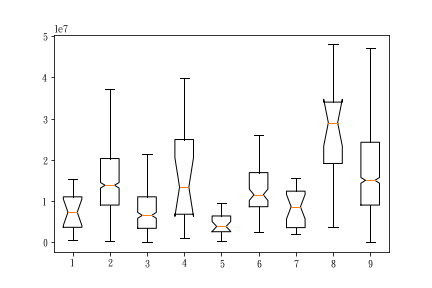

## 新北市正常建物為例

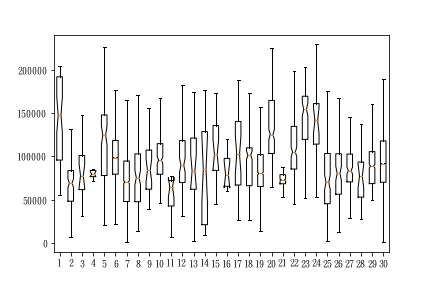

## 獲取各類數據之統計量（依縣市）

In [ ]:
for county_key in county_dict:
    df = pd.read_excel('統整_{}_透天厝.xlsx'.format(county_key))
    y = df.at[0,'50%']
    x = df.at[0,'mean']
    df['Median Compare Rate']=round(df['50%']/y,5)
    df['Mean Compare Rate']=round(df['mean']/x,5)
    df.to_excel('統整_{}_透天厝.xlsx'.format(county_key),index=False)

In [5]:
df = pd.read_excel('統整_新北市_透天厝.xlsx',index_col='Unnamed: 0.1')
df

,25%,50%,75%,count,max,mean,min,std,Mediam Compare Rate,Mean Compare Rate
Unnamed: 0.1,,,,,,,,,,
無價格影響之資料_新北市_透天厝,9.000000e+06,15000000.0,24250000.0,1197,2.050763e+09,2.417915e+07,3005.0,8.002360e+07,0.0,0.0
含增建或未登記建物_新北市_透天厝,9.000000e+06,13800000.0,20300000.0,705,1.410000e+08,1.699483e+07,300000.0,1.390413e+07,-8.0,-29.7
親友、員工或其他特殊關係間之交易_新北市_透天厝,3.355000e+06,6500000.0,11000000.0,283,7.200000e+07,8.485461e+06,77000.0,8.013116e+06,-56.7,-64.9
包含須注意之增建_新北市_透天厝,8.600000e+06,11500000.0,16880000.0,89,6.000000e+07,1.520955e+07,2500000.0,1.153254e+07,-23.3,-37.1
共有及持分交易_新北市_透天厝,2.530000e+06,3800000.0,6354000.0,25,6.540960e+07,9.808572e+06,337050.0,1.744983e+07,-74.7,-59.4
其他稅、費相關_新北市_透天厝,3.524497e+06,8596075.0,12375000.0,22,1.560000e+07,8.167911e+06,1880000.0,4.661079e+06,-42.7,-66.2
土地及建物分次登記案件_新北市_透天厝,1.910000e+07,29000000.0,34000000.0,17,7.400000e+07,3.038529e+07,3680000.0,1.884879e+07,93.3,25.7
受債權債務影響或債務抵償之交易_新北市_透天厝,6.775000e+06,13373563.5,24915000.0,16,6.800000e+07,2.018879e+07,1003561.0,2.096851e+07,-10.8,-16.5
瑕疵物件之交易_新北市_透天厝,3.600000e+06,7260000.0,11000000.0,13,7.100000e+07,1.410848e+07,600000.0,2.035201e+07,-51.6,-41.7
